'''<br>
    @Author: Deven Gupta<br>
    @Date: 11-09-2024<br>
    @Last Modified by: Deven Gupta<br>
    @Last Modified time: 11-09-2024 <br>
    @Title : Python program to perform CRUD Operation in S3 using Boto3(Lambda)<br>
    <br>
'''

In [ ]:
import boto3
import json
from dotenv import load_dotenv

In [ ]:
load_dotenv()

In [ ]:
s3 = boto3.client('s3')

In [ ]:
def lambda_handler(event, context):
    # Define the bucket name and object key
    bucket_name = 'deven-lambda-crud-operation'
    object_key = event.get('object_key')

    # Extract the action type from the event
    action = event.get('action')
    
    # Initialize response variables
    status_code = 500
    response_body = 'Error: Unknown action or missing parameters.'

    try:
        if action == 'upload':
            # Upload file content
            file_content = event.get('file_content', 'Hello, world!')
            s3.put_object(Bucket=bucket_name, Key=object_key, Body=file_content)
            status_code = 200
            response_body = 'File uploaded successfully!'

        elif action == 'read':
            # Read file content
            response = s3.get_object(Bucket=bucket_name, Key=object_key)
            file_content = response['Body'].read().decode('utf-8')
            status_code = 200
            response_body = json.dumps(file_content)

        elif action == 'update':
            # Update file content
            new_content = event.get('new_content', 'Updated content!')
            s3.put_object(Bucket=bucket_name, Key=object_key, Body=new_content)
            status_code = 200
            response_body = 'File updated successfully!'

        elif action == 'delete':
            # Delete file
            s3.delete_object(Bucket=bucket_name, Key=object_key)
            status_code = 200
            response_body = 'File deleted successfully!'

        else:
            response_body = 'Error: Invalid action specified.'

    except Exception as e:
        response_body = f'Error: {str(e)}'

    return {
        'statusCode': status_code,
        'body': response_body
    }


<h3 style='color:yellow'>create-event</h3>
{<br>
  "action": "upload",<br>
  "file_content": "Hello my name is deven",<br>
  "object_key": "demofile.txt"<br>
}<br>

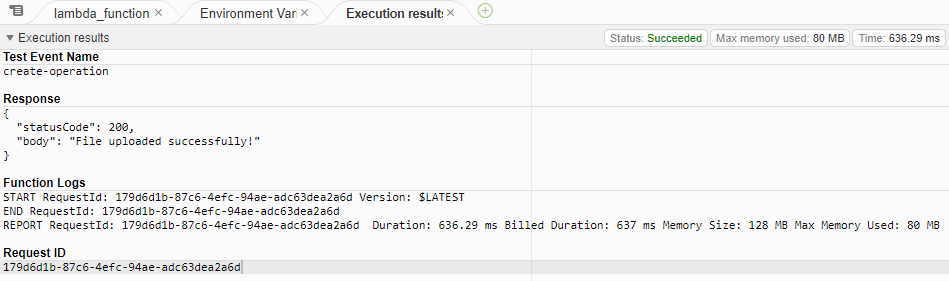

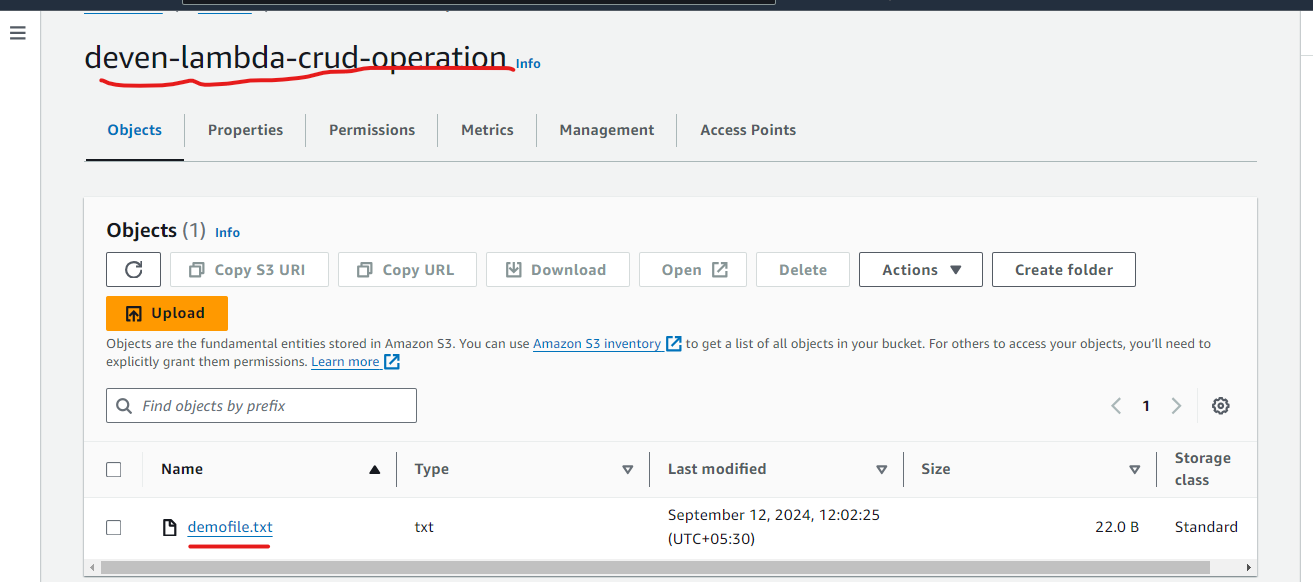

<h3 style='color:yellow'>read-event</h3>
{<br>
  "action": "read",<br>
  "object_key": "demofile.txt"<br>
}<br>

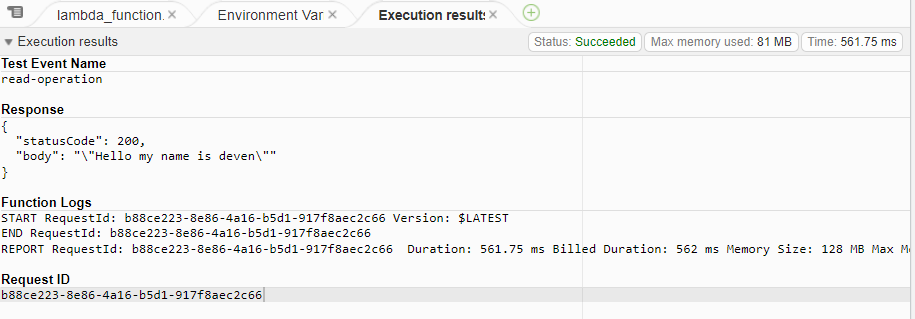

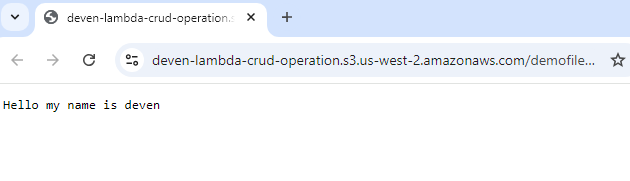

<h3 style='color:yellow'>update-event</h3>
{<br>
  "action": "update",<br>
  "object_key": "demofile.txt",<br>
  "new_content":"THIS IS NEW CONTENT hello guys"<br>
}<br>

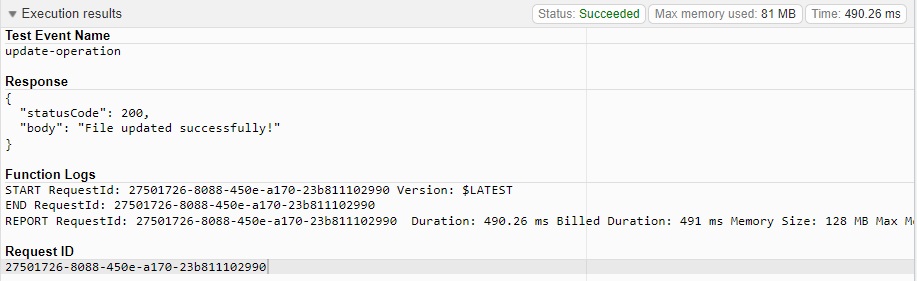

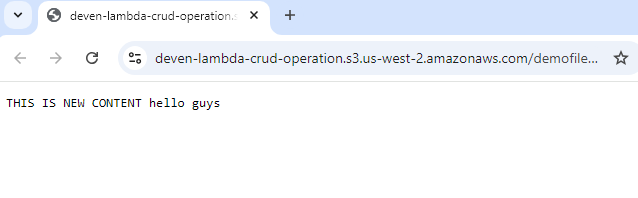

<h3 style='color:yellow'>delete-event</h3>
{<br>
  "action": "delete",<br>
  "object_key": "demofile.txt"<br>
}<br>

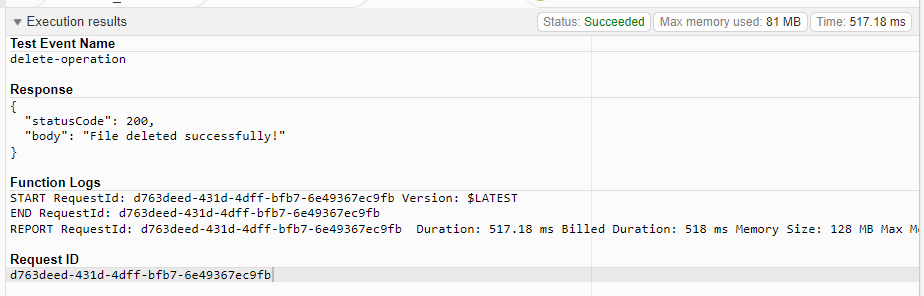

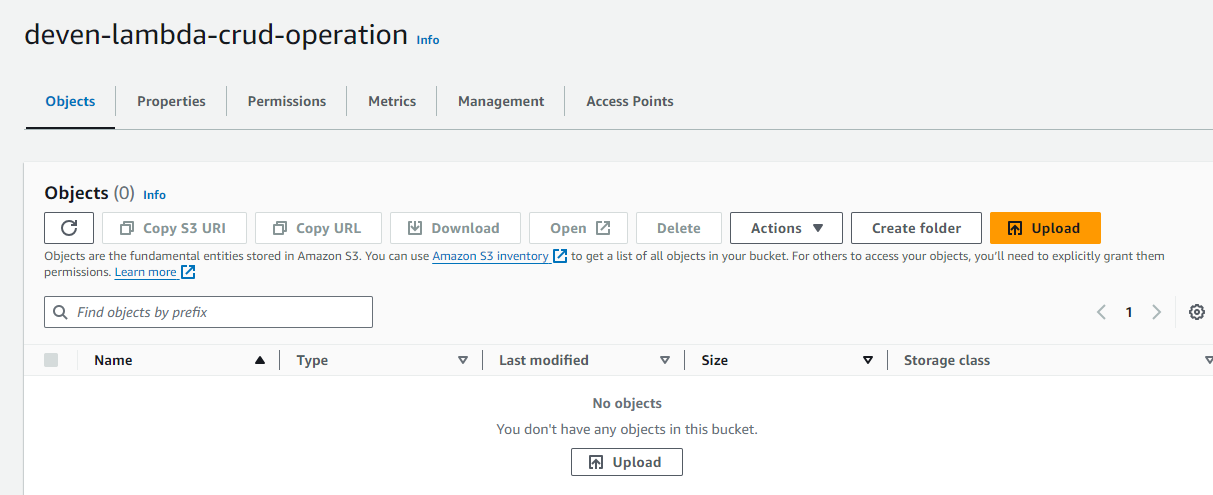